# 图像增广
对图像进行一系列的随机变化，生成不同的训练样本，从而扩大训练集的规模  
同时也能提高模型的泛化能力

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

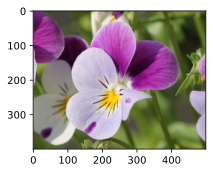

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

d2l.set_figsize()
img = d2l.Image.open('../data/cat1.jpg')
d2l.plt.imshow(img);

In [3]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):         #   多次运行增广结果并显示所有结果
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

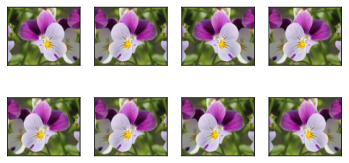

In [5]:
#   翻转与裁剪
apply(img, torchvision.transforms.RandomHorizontalFlip())   #   左右翻转

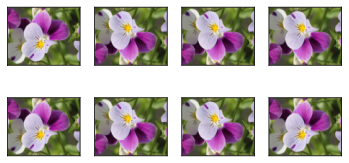

In [6]:
apply(img, torchvision.transforms.RandomVerticalFlip()) #   上下翻转

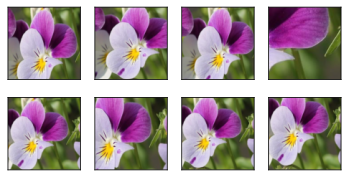

In [7]:
# 裁剪
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

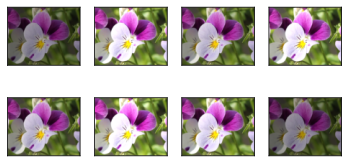

In [8]:
# 改变颜色
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

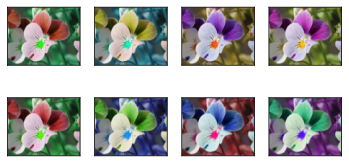

In [9]:
#   改变色调
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

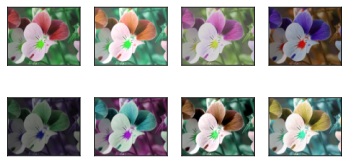

In [10]:
#   同时改变
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 常用图像增广方法
翻转、裁剪、变换颜色

### 小结
1.图像增广基于现有的训练数据生成随机图像，来提高模型的泛化能力。

2.为了在预测过程中得到确切的结果，我们通常对训练样本只进行图像增广，而在预测过程中不使用带随机操作的图像增广。

3.深度学习框架提供了许多不同的图像增广方法，这些方法可以被同时应用。